# Il solitario del monaco pazzo

In [7]:
mazzo = list(range(10))*4

In [10]:
print(mazzo)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [11]:
%matplotlib inline
from matplotlib import pyplot as plt

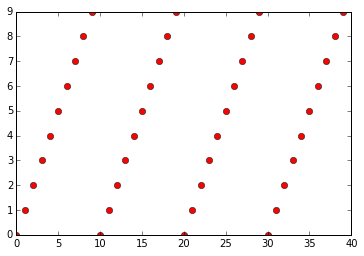

In [12]:
# modo alternativo
plt.plot([x%10 for x in range(40)],"ro")

In [13]:
#mischiamo
from random import shuffle
shuffle(mazzo)

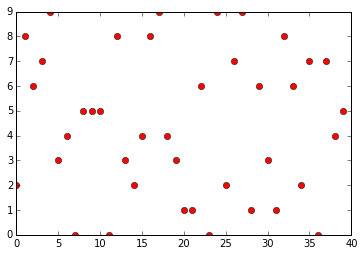

In [14]:
plt.plot(mazzo,"ro")

In [16]:
pattern_conta = [x%3 for x in range(40)]

In [17]:
print(pattern_conta)

[0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0]


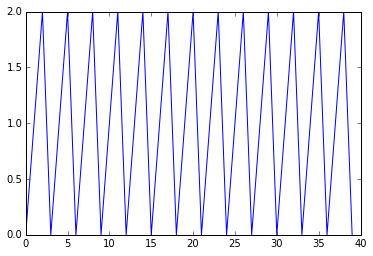

In [18]:
plt.plot(pattern_conta)

*Esercizio*: provate a plottare sia il pattern che il mazzo, e vedete se le eventuali collisioni sono visibili

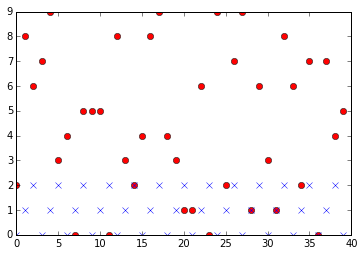

In [40]:
plt.plot(mazzo,"ro")
plt.plot(pattern_conta, 'x')

In [44]:
# Usiamo zip
list(zip([1,2,3], [10,20,30]))

[(1, 10), (2, 20), (3, 30)]

Cosa sono quegli elementi con le `(`? Sono delle "tuple": come le liste, ma _invariabili_ (cioè non posso modificarne gli elementi)

In [49]:
a = [1,2,3]

In [50]:
print(a)

[1, 2, 3]


In [52]:
a[0]=10
print(a)

[10, 2, 3]


In [53]:
# proviamo con le tuple

In [54]:
b = (1,2,3)
print(b)

(1, 2, 3)


In [55]:
b[0] = 12

TypeError: 'tuple' object does not support item assignment

In [60]:
mazzo_conta = list(zip(mazzo, pattern_conta))
print(mazzo_conta)

[(2, 0), (8, 1), (6, 2), (7, 0), (9, 1), (3, 2), (4, 0), (0, 1), (5, 2), (5, 0), (5, 1), (0, 2), (8, 0), (3, 1), (2, 2), (4, 0), (8, 1), (9, 2), (4, 0), (3, 1), (1, 2), (1, 0), (6, 1), (0, 2), (9, 0), (2, 1), (7, 2), (9, 0), (1, 1), (6, 2), (3, 0), (1, 1), (8, 2), (6, 0), (2, 1), (7, 2), (0, 0), (7, 1), (4, 2), (5, 0)]


In [61]:
mazzo_conta[20]

(1, 2)

In [62]:
mazzo_conta[20][0] == mazzo_conta[20][1]

False

*Esercizio*: scrivete una funzione che dato un "mazzo" dica se si perde o si vince (suggerimento: prima fate qualche esperimento con espressioni "volanti", e poi generalizzate in una funzione)

In [66]:
print([mc[0] == mc[1] for mc in mazzo_conta])

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, True, False, False, False]


In [64]:
sum(_)

4

In [67]:
def vinco(mazzo):
    pattern_conta = [x%3 for x in range(len(mazzo))]
    return sum([x[0]==x[1] for x in zip(mazzo, pattern_conta)]) == 0

In [68]:
def genera_mazzo():
    mazzo = [x%10 for x in range(40)]
    shuffle(mazzo)
    return mazzo

In [70]:
sum([vinco(genera_mazzo()) for x in range(100000)])/100000

0.00791

*Esercizio*: cosa succede per conteggi diversi (4,5,6,... etc)? Plotta un grafico che dice come varia il tutto

In [81]:
def vinco(mazzo, n=3):
    pattern_conta = [x%n for x in range(len(mazzo))]
    return sum([x[0]==x[1] for x in zip(mazzo, pattern_conta)]) == 0

def p(n, nprove=1000):
    return sum([vinco(genera_mazzo(), n) for x in range(nprove)])/nprove

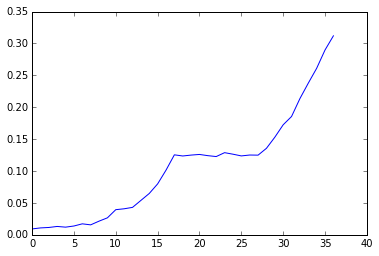

In [90]:
plt.plot([p(x,10000) for x in range(3, 40)])

*Esercizio*: qual è il numero medio di mosse prima di fallire?

In [112]:
def m():
    i = 0
    mazzo = genera_mazzo()

    while(i<40 and mazzo[i] != i%3):
        i = i + 1
    return i

In [132]:
sum([m() for _ in range(10000)])/10000

8.5664